<a href="https://colab.research.google.com/github/vineet-codes/ai-notebooks/blob/main/fastai_vision_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! [ -e /content ] && pip install -Uqq fastai  # upgrade fastai on colab

     |████████████████████████████████| 194kB 31.3MB/s 
     |████████████████████████████████| 61kB 8.9MB/s 


In [4]:

from fastai.data.all import * 
from fastai.vision.all import * 

In [5]:
path = untar_data(URLs.PETS)

In [6]:
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/images'),Path('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [11]:
!ls '{path}/images' | wc -l

7393


## DataBlock API 

1. `get_items`: get your data source,
2. `get_y`: labelling the data, controlling the target variable, 
3. `blocks`: define, input/output data types,
4. `splitter`: control how validation set is created,
5. `item_tfms`: item transformations



> Note that you can mix and match any block for input and targets, which is why the API is named data block API. 

The way we usually build the data block in one go is by answering a list of questions: 

- what is the types of your inputs/targets? Here images and categories
- where is your data? Here in filenames in subfolders
- does something need to be applied to inputs? Here no
- does something need to be applied to the target? Here the label_func function
- how to split the data? Here randomly
- do we need to apply something on formed items? Here a resize
- do we need to apply something on formed batches? Here no


In [31]:
def label_func(fname):
  return 'cat' if fname.name[0].isupper() else 'dog'

In [34]:
idx = 10
label_func(fname[idx]), fname[idx]

('dog',
 Path('/root/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_26.jpg'))

In [40]:
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items = get_image_files, 
                   get_y = label_func,
                   splitter = RandomSplitter(seed=2021),
                   item_tfms=Resize(224)
                   )

dsets = dblock.datasets(path/"images")
dsets

(#7390) [(PILImage mode=RGB size=500x375, TensorCategory(0)),(PILImage mode=RGB size=300x225, TensorCategory(1)),(PILImage mode=RGB size=500x333, TensorCategory(1)),(PILImage mode=RGB size=500x375, TensorCategory(1)),(PILImage mode=RGB size=500x333, TensorCategory(1)),(PILImage mode=RGB size=500x486, TensorCategory(0)),(PILImage mode=RGB size=500x375, TensorCategory(1)),(PILImage mode=RGB size=263x380, TensorCategory(0)),(PILImage mode=RGB size=321x250, TensorCategory(0)),(PILImage mode=RGB size=500x333, TensorCategory(1))...]

In [41]:
dsets.vocab

['cat', 'dog']

## Image Classification

### MNIST

In [44]:
path = untar_data(URLs.MNIST_TINY)

In [48]:
mnist = DataBlock( blocks=(ImageBlock(cls=PILImageBW), CategoryBlock),
                  get_items = get_image_files,
                  get_y = parent_label, 
                  splitter = GrandparentSplitter(),
                  )

In [49]:
dls = mnist.dataloaders(path)

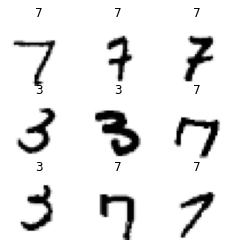

In [50]:
dls.show_batch(figsize=(4,4))

### Pets (single Label)

In [51]:
path = untar_data(URLs.PETS)

In [52]:
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/images'),Path('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [53]:
pets = DataBlock( blocks=(ImageBlock, CategoryBlock),
                 get_items = get_image_files, 
                 get_y = Pipeline([attrgetter("name"), RegexLabeller(pat = r'^(.*)_\d+.jpg$')]),
                 splitter = RandomSplitter(),
                 item_tfms= Resize(128),
                 batch_tfms= aug_transforms()
                 )

In [54]:
dls = pets.dataloaders(path/"images")

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1023: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  ret = func(*args, **kwargs)


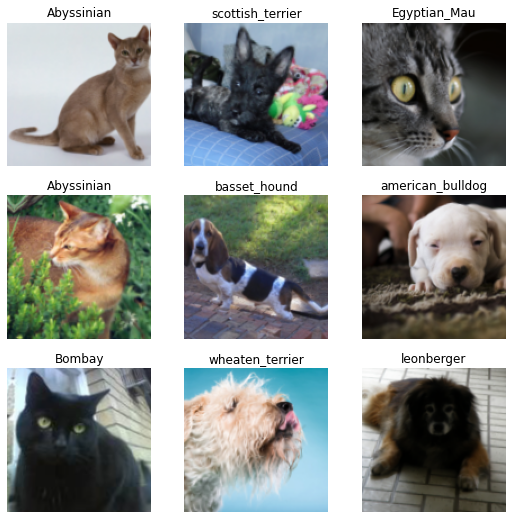

In [55]:
dls.show_batch(max_n=9)

In [56]:
xb, yb = dls.one_batch()

In [62]:
xb.shape, yb.shape

(torch.Size([64, 3, 128, 128]), torch.Size([64]))

### Pascal (Multi-Label)

In [63]:
path = untar_data(URLs.PASCAL_2007)
path

Path('/root/.fastai/data/pascal_2007')

In [ ]:
path.ls()

In [65]:
df = pd.read_csv(path/"train.csv")

In [66]:
df.head(n=10)

,fname,labels,is_valid
0,000005.jpg,chair,True
1,000007.jpg,car,True
2,000009.jpg,horse person,True
3,000012.jpg,car,False
4,000016.jpg,bicycle,True
5,000017.jpg,person horse,False
6,000019.jpg,cat,True
7,000020.jpg,car,True
8,000021.jpg,dog person,True
9,000023.jpg,bicycle person,False


In [69]:
pascal = DataBlock( blocks = (ImageBlock, MultiCategoryBlock), 
                   get_x = ColReader(0, pref=path/"train"), 
                   get_y = ColReader(1, label_delim=' '), 
                   splitter= ColSplitter(), 
                   item_tfms = Resize(224),
                   batch_tfms = aug_transforms()
                   )

In [72]:
dls = pascal.dataloaders(df)

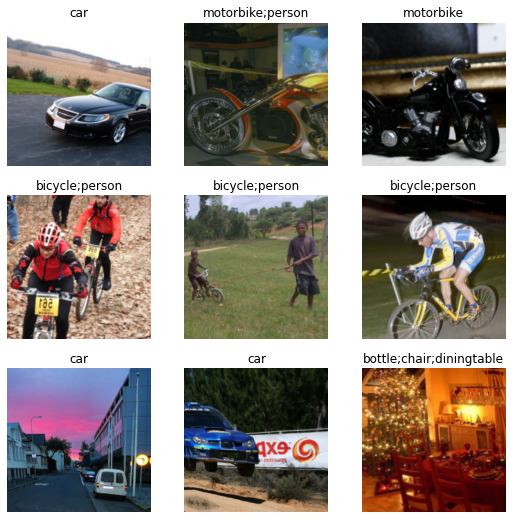

In [73]:
dls.show_batch()

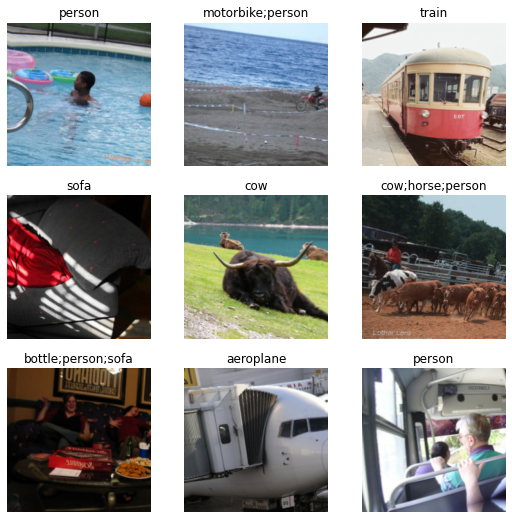

In [75]:
pascal = DataBlock( blocks = (ImageBlock, MultiCategoryBlock), 
                   get_x = lambda x: f'{path}/train/{x[0]}', 
                   get_y = lambda y: y[1].split(' '), 
                   splitter= ColSplitter(), 
                   item_tfms = Resize(224),
                   batch_tfms = aug_transforms()
                   )

dls = pascal.dataloaders(df)
dls.show_batch()

## Image Localisation

In [76]:
default_device()

device(type='cpu')

In [79]:
p = default_device()

In [80]:
p

device(type='cpu')